In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.datasets import mnist

In [215]:
data = mnist.load_data()

In [216]:
target = data[0][1]

In [217]:
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [218]:
X = data[0][0]

In [219]:
X = X.reshape((60000,28,28,1))

In [220]:
X.shape

(60000, 28, 28, 1)

In [221]:
X_train,X_test,Y_train,Y_test = train_test_split(X,target)

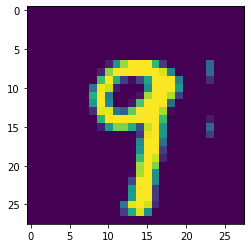

In [222]:
plt.imshow(X_train[1].reshape(28,28) )
plt.show()

## 95.44 % 

In [73]:
model = Sequential()
model.add( Conv2D(256,(7,7),activation = "relu",input_shape=(28,28,1) ) )
model.add( MaxPooling2D((7,7)))
model.add(Flatten())
model.add( Dense(64,activation='sigmoid'   ))
model.add( Dense(10,activation='softmax'))

In [74]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )

In [75]:
model.fit(X_train, to_categorical(Y_train),epochs=20,batch_size=100)

Epoch 1/20
450/450 [==============================] - 41s 91ms/step - loss: 1.3475 - accuracy: 0.7901
Epoch 2/20
450/450 [==============================] - 41s 91ms/step - loss: 0.5805 - accuracy: 0.9300
Epoch 3/20
450/450 [==============================] - 40s 90ms/step - loss: 0.3409 - accuracy: 0.9473
Epoch 4/20
450/450 [==============================] - 40s 90ms/step - loss: 0.2637 - accuracy: 0.9502
Epoch 5/20
450/450 [==============================] - 41s 90ms/step - loss: 0.2203 - accuracy: 0.9554
Epoch 6/20
450/450 [==============================] - 39s 87ms/step - loss: 0.1965 - accuracy: 0.9553
Epoch 7/20
450/450 [==============================] - 38s 85ms/step - loss: 0.1799 - accuracy: 0.9555
Epoch 8/20
450/450 [==============================] - 42s 94ms/step - loss: 0.1615 - accuracy: 0.9591
Epoch 9/20
450/450 [==============================] - 41s 92ms/step - loss: 0.1445 - accuracy: 0.9620
Epoch 10/20
450/450 [==============================] - 41s 91ms/step - loss: 0.147

In [76]:
Y_pred1 = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [78]:
model.evaluate(X_test,to_categorical(Y_test) )

469/469 [==============================] - 5s 10ms/step - loss: 0.1477 - accuracy: 0.9544


[0.14768871665000916, 0.9544000029563904]

# 98.6 % 

In [226]:
model = Sequential()
model.add( Conv2D(40,(4,4),activation = "sigmoid",input_shape=(28,28,1) ) )
model.add( MaxPooling2D((4,4)))
model.add(Flatten())
model.add( Dense(256,activation='sigmoid'   ))
model.add( Dense(10,activation='softmax'))

In [227]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )

In [228]:
model.fit(X_train, to_categorical(Y_train),epochs=20,batch_size=100)

Epoch 1/20
450/450 [==============================] - 13s 29ms/step - loss: 0.5062 - accuracy: 0.8673
Epoch 2/20
450/450 [==============================] - 13s 29ms/step - loss: 0.1314 - accuracy: 0.9634
Epoch 3/20
450/450 [==============================] - 13s 29ms/step - loss: 0.0925 - accuracy: 0.9731
Epoch 4/20
450/450 [==============================] - 13s 29ms/step - loss: 0.0738 - accuracy: 0.9779
Epoch 5/20
450/450 [==============================] - 13s 29ms/step - loss: 0.0657 - accuracy: 0.9795
Epoch 6/20
450/450 [==============================] - 13s 29ms/step - loss: 0.0564 - accuracy: 0.9831
Epoch 7/20
450/450 [==============================] - 13s 30ms/step - loss: 0.0488 - accuracy: 0.9845
Epoch 8/20
450/450 [==============================] - 13s 29ms/step - loss: 0.0428 - accuracy: 0.9870
Epoch 9/20
450/450 [==============================] - 13s 29ms/step - loss: 0.0368 - accuracy: 0.9889
Epoch 10/20
450/450 [==============================] - 13s 29ms/step - loss: 0.033

In [229]:
Y_pred2 = model.predict_classes(X_test)

In [233]:
model.evaluate(X_test,to_categorical(Y_test) )

469/469 [==============================] - 2s 3ms/step - loss: 0.0464 - accuracy: 0.9876


[0.046372588723897934, 0.9876000285148621]

In [232]:
pd.DataFrame({
    'Label':Y_pred2
}).to_csv('Prediction.csv',index=False)